In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [3]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [84]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

# X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
# X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
# X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)
X_train_reshaped_lstm = X_train_lstm.reshape(
    X_train_lstm.shape[0], X_train_lstm.shape[1])
X_val_reshaped_lstm = X_val_lstm.reshape(
    X_val_lstm.shape[0], X_val_lstm.shape[1])
X_test_reshaped_lstm = X_test_lstm.reshape(
    X_test_lstm.shape[0], X_test_lstm.shape[1])

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [172]:
lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dense(1, activation='tanh'))
lstm_model.add(Dropout(0.5))


In [173]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.4528 - accuracy: 0.9677 - val_loss: 0.0475 - val_accuracy: 0.9780
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4145 - accuracy: 0.9733 - val_loss: 0.0218 - val_accuracy: 0.9970
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4270 - accuracy: 0.9728 - val_loss: 0.0184 - val_accuracy: 0.9965
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3848 - accuracy: 0.9753 - val_loss: 0.0183 - val_accuracy: 0.9960
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4069 - accuracy: 0.9738 - val_loss: 0.0113 - val_accuracy: 0.9980
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3799 - accuracy: 0.9755 - val_loss: 0.0095 - val_accuracy: 0.9980
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3766 - accuracy: 0.9758 - val_loss: 0.0098 - val_accuracy: 0.9980
Epoch 

In [174]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3844 - accuracy: 0.9750 - val_loss: 0.0053 - val_accuracy: 0.9995
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3778 - accuracy: 0.9748 - val_loss: 0.0070 - val_accuracy: 0.9985
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3765 - accuracy: 0.9757 - val_loss: 0.0063 - val_accuracy: 0.9980
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3402 - accuracy: 0.9780 - val_loss: 0.0053 - val_accuracy: 0.9980
Epoch 5/30
188/188 [==============================] - 1s 7ms/step - loss: 0.3919 - accuracy: 0.9747 - val_loss: 0.0058 - val_accuracy: 0.9980
Epoch 6/30
188/188 [==============================] - 1s 7ms/step - loss: 0.3916 - accuracy: 0.9747 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3815 - accuracy: 0.9753 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 

In [175]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3735 - accuracy: 0.9758 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3735 - accuracy: 0.9758 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3786 - accuracy: 0.9755 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3889 - accuracy: 0.9748 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3709 - accuracy: 0.9760 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4069 - accuracy: 0.9737 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3606 - accuracy: 0.9767 - val_loss: 0.0040 - val_accuracy: 0.9990
Epoch 

In [176]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3554 - accuracy: 0.9770 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3631 - accuracy: 0.9765 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3734 - accuracy: 0.9758 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3503 - accuracy: 0.9773 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3965 - accuracy: 0.9743 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3811 - accuracy: 0.9753 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3888 - accuracy: 0.9748 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 

In [177]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3894 - accuracy: 0.9747 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4049 - accuracy: 0.9737 - val_loss: 0.0055 - val_accuracy: 0.9990
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3684 - accuracy: 0.9762 - val_loss: 0.0084 - val_accuracy: 0.9975
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3762 - accuracy: 0.9755 - val_loss: 0.0071 - val_accuracy: 0.9975
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3741 - accuracy: 0.9757 - val_loss: 0.0059 - val_accuracy: 0.9980
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3733 - accuracy: 0.9758 - val_loss: 0.0065 - val_accuracy: 0.9980
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3993 - accuracy: 0.9740 - val_loss: 0.0098 - val_accuracy: 0.9975
Epoch 

In [178]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9960
Test LSTM Loss:  0.012895103543996811
Test LSTM Accuracy:  0.9959999918937683


In [183]:
lstm_train_probs = lstm_model.predict(X_train_reshaped_lstm, verbose=0)
lstm_train_classes = (lstm_model.predict(
    X_train_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_train_probs = lstm_train_probs[:, 0]
lstm_train_classes = lstm_train_classes[:, 0]

lstm_train_accuracy = accuracy_score(y_train_lstm, lstm_train_classes)
print("Accuracy: ", lstm_train_accuracy)

lstm_train_precision = precision_score(y_train_lstm, lstm_train_classes)
print("Precision: ", lstm_train_precision)

lstm_train_recall = recall_score(y_train_lstm, lstm_train_classes)
print("Recall: ", lstm_train_recall)

train_f1_score_value_lstm = f1_score(y_train_lstm, lstm_train_classes)
print("F1 score: ", train_f1_score_value_lstm)


Accuracy:  0.9956666666666667
Precision:  1.0
Recall:  0.911864406779661
F1 score:  0.953900709219858


In [194]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_model.predict(
    X_test_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test_lstm, lstm_classes)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  0.996
Precision:  1.0
Recall:  0.9207920792079208
F1 score:  0.9587628865979382


In [82]:
metrics = ['Precision', 'Recall', 'F1-Score']


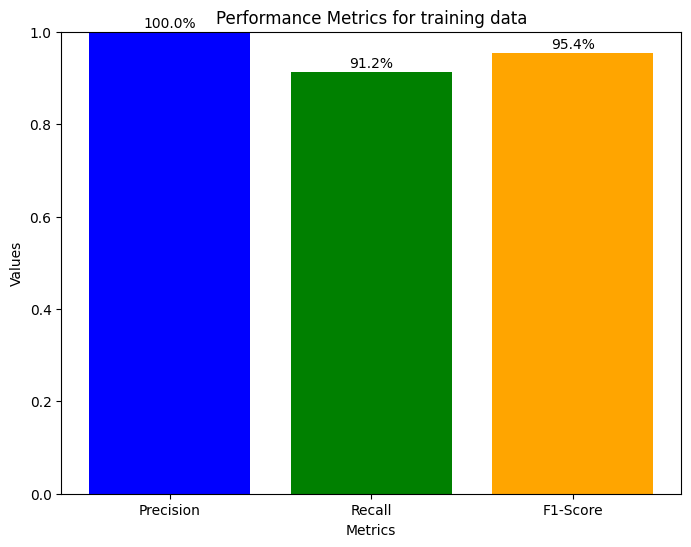

In [203]:
lstm_train_values = [lstm_train_precision,
                     lstm_train_recall, train_f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_train_matrix_bars = plt.bar(metrics, lstm_train_values, color=[
    'blue', 'green', 'orange'])
for bar in lstm_train_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training data')
plt.ylim([0, 1])
plt.show()


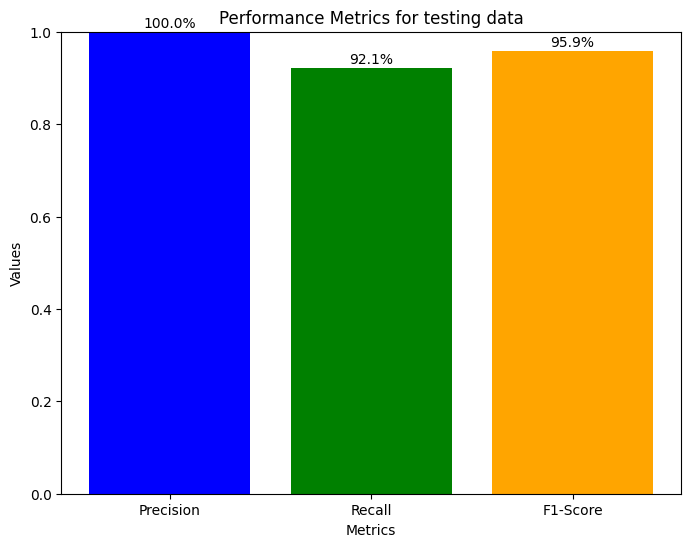

In [204]:
lstm_values = [lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=[
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for testing data')
plt.ylim([0, 1])
plt.show()


In [94]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [98]:
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dense(units=1, activation='sigmoid'))
gru_model.add(Dropout(0.5))


In [99]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 2.4683 - accuracy: 0.4991 - val_loss: 0.7303 - val_accuracy: 0.9487
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 1.2709 - accuracy: 0.4936 - val_loss: 0.6373 - val_accuracy: 0.9707
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 1.1215 - accuracy: 0.5163 - val_loss: 0.5640 - val_accuracy: 0.9867
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.9562 - accuracy: 0.6399 - val_loss: 0.4932 - val_accuracy: 0.9953
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.8778 - accuracy: 0.8404 - val_loss: 0.4208 - val_accuracy: 0.9960
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.7632 - accuracy: 0.9499 - val_loss: 0.3532 - val_accuracy: 0.9953
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.9727 - val_loss: 0.3001 - val_accuracy: 0.9933
Epoch 

In [100]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 3s 3ms/step - loss: 0.4202 - accuracy: 0.9733 - val_loss: 0.0372 - val_accuracy: 0.9853
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.9753 - val_loss: 0.0221 - val_accuracy: 0.9980
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.9741 - val_loss: 0.0225 - val_accuracy: 0.9947
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.9740 - val_loss: 0.0196 - val_accuracy: 0.9973
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.9741 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.9741 - val_loss: 0.0161 - val_accuracy: 0.9993
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.9750 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 

In [101]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.3712 - accuracy: 0.9760 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.9756 - val_loss: 0.0090 - val_accuracy: 0.9987
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.9744 - val_loss: 0.0091 - val_accuracy: 0.9980
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.9757 - val_loss: 0.0092 - val_accuracy: 0.9980
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.9747 - val_loss: 0.0088 - val_accuracy: 0.9993
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.9750 - val_loss: 0.0090 - val_accuracy: 0.9987
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.9750 - val_loss: 0.0092 - val_accuracy: 0.9980
Epoch 

In [102]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.3685 - accuracy: 0.9761 - val_loss: 0.0087 - val_accuracy: 0.9993
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.9749 - val_loss: 0.0089 - val_accuracy: 0.9987
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.9724 - val_loss: 0.0090 - val_accuracy: 0.9987
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.9764 - val_loss: 0.0091 - val_accuracy: 0.9987
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.9744 - val_loss: 0.0092 - val_accuracy: 0.9980
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.9754 - val_loss: 0.0092 - val_accuracy: 0.9987
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.9763 - val_loss: 0.0091 - val_accuracy: 0.9987
Epoch 

In [103]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.4081 - accuracy: 0.9736 - val_loss: 0.0118 - val_accuracy: 0.9980
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.9753 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.9747 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.9767 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.9744 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.9757 - val_loss: 0.0098 - val_accuracy: 0.9993
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.9740 - val_loss: 0.0135 - val_accuracy: 0.9960
Epoch 

In [104]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 984us/step - loss: 0.0095 - accuracy: 0.9980
Test GRU Loss:  0.009535061195492744
Test GRU Accuracy:  0.9980000257492065


In [105]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_model.predict(
    X_test_reshaped_gru, verbose=0) > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test_gru, gru_classes)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.998
Precision:  1.0
Recall:  0.9571428571428572
F1 score:  0.9781021897810218


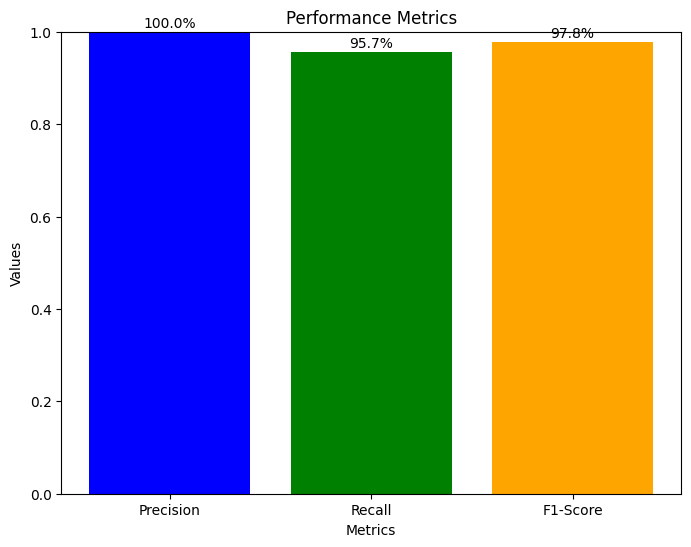

In [106]:
gru_values = [gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=[
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


In [27]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [28]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation="relu"))

cnn_model.add(Dropout(0.5))


In [29]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5868 - accuracy: 0.1486 - val_loss: 0.2986 - val_accuracy: 0.5053
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.7429 - val_loss: 0.2879 - val_accuracy: 0.8213
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8169 - val_loss: 0.2838 - val_accuracy: 0.8907
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.9070 - val_loss: 0.2812 - val_accuracy: 0.9073
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.9147 - val_loss: 0.2800 - val_accuracy: 0.9193
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5453 - accuracy: 0.9210 - val_loss: 0.2794 - val_accuracy: 0.9253
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.9196 - val_loss: 0.2789 - val_accuracy: 0.9387
Epoch 

In [30]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.9434 - val_loss: 0.2639 - val_accuracy: 0.9540
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.9459 - val_loss: 0.2636 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.9466 - val_loss: 0.2624 - val_accuracy: 0.9487
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.9463 - val_loss: 0.2631 - val_accuracy: 0.9527
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.9470 - val_loss: 0.2617 - val_accuracy: 0.9253
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.9473 - val_loss: 0.2632 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.9461 - val_loss: 0.2622 - val_accuracy: 0.9533
Epoch 

In [31]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.9491 - val_loss: 0.2516 - val_accuracy: 0.9533
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.9490 - val_loss: 0.2514 - val_accuracy: 0.9520
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.9489 - val_loss: 0.2515 - val_accuracy: 0.9520
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.9489 - val_loss: 0.2514 - val_accuracy: 0.9520
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.9486 - val_loss: 0.2514 - val_accuracy: 0.9520
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.9477 - val_loss: 0.2514 - val_accuracy: 0.9520
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.9480 - val_loss: 0.2514 - val_accuracy: 0.9520
Epoch 

In [32]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.9473 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.9476 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.9467 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.9473 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.9467 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.9469 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.9461 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 

In [33]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5283 - accuracy: 0.9443 - val_loss: 0.2522 - val_accuracy: 0.9487
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.9421 - val_loss: 0.2525 - val_accuracy: 0.9420
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.9414 - val_loss: 0.2544 - val_accuracy: 0.9520
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.9441 - val_loss: 0.2555 - val_accuracy: 0.9500
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.9431 - val_loss: 0.2546 - val_accuracy: 0.9533
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.9429 - val_loss: 0.2549 - val_accuracy: 0.9520
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.9444 - val_loss: 0.2543 - val_accuracy: 0.9513
Epoch 

In [34]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9507
Test CNN Loss:  0.2677752375602722
Test CNN Accuracy:  0.9506666660308838


In [35]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_model.predict(
    X_test_reshaped_cnn, verbose=0) > 0.5).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes, zero_division=1)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes, zero_division=1)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test_cnn, cnn_classes, zero_division=1)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.9533333333333334
Precision:  1.0
Recall:  0.0
F1 score:  0.0


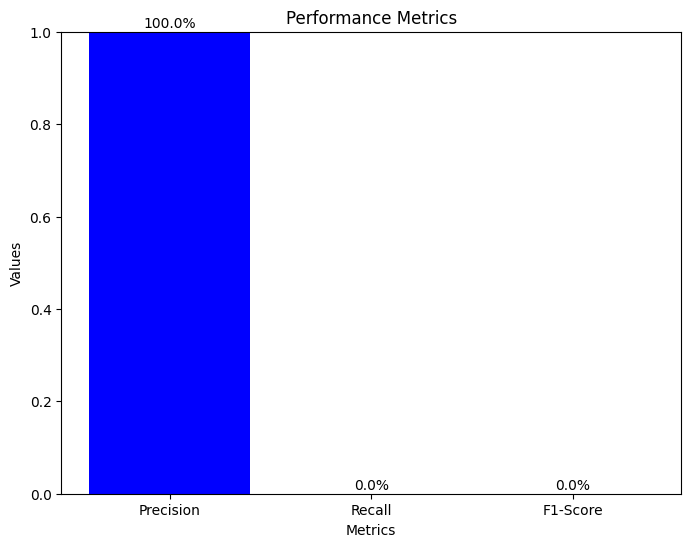

In [36]:
cnn_values = [cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=[
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


In [37]:
# # ----- LSTM Adam Loss -----
# plt.plot(lstm_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(lstm_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Nadam Loss -----
# plt.plot(lstm_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(lstm_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Adgrad Loss -----
# plt.plot(lstm_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(lstm_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM SGD Loss -----
# plt.plot(lstm_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(lstm_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM RMSProp Loss -----
# plt.plot(lstm_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(lstm_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


# # plt.figure(figsize=(12, 6))

# # lstm_adam_h = np.mean(lstm_adam_history.history['loss'])
# # lstm_nadam_h = np.mean(lstm_nadam_history.history['loss'])
# # lstm_adagrad_h = np.mean(lstm_adagrad_history.history['loss'])
# # lstm_sgd_h = np.mean(lstm_sgd_history.history['loss'])
# # lstm_rms_h = np.mean(lstm_rms_history.history['loss'])


# # lstm_optimizers = [lstm_adam_h, lstm_nadam_h,
# #                    lstm_adagrad_h, lstm_sgd_h, lstm_rms_h]

# # plt.plot(lstm_optimizers, label="Loss", color='blue')
# # # plt.plot(lstm_optimizers, label="Validation Loss", color='lightblue')

# # plt.title("Training and Validation loss in LSTM")
# # plt.xlabel("Epoch")
# # plt.ylabel("Loss")
# # plt.legend()
# # plt.grid(True)
# # plt.show()


In [38]:
# # ----- LSTM Adam Accuracy -----
# plt.plot(lstm_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(lstm_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Nadam Accuracy -----
# plt.plot(lstm_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(lstm_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Adgrad Accuracy -----
# plt.plot(lstm_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(lstm_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM SGD Accuracy -----
# plt.plot(lstm_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(lstm_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM RMSProp Accuracy -----
# plt.plot(lstm_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(lstm_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [39]:
# # ----- GRU Adam Loss -----
# plt.plot(gru_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(gru_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Nadam Loss -----
# plt.plot(gru_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(gru_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Adgrad Loss -----
# plt.plot(gru_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(gru_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU SGD Loss -----
# plt.plot(gru_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(gru_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU RMSProp Loss -----
# plt.plot(gru_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(gru_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [40]:
# # ----- GRU Adam Accuracy -----
# plt.plot(gru_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(gru_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Nadam Accuracy -----
# plt.plot(gru_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(gru_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Adgrad Accuracy -----
# plt.plot(gru_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(gru_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU SGD Accuracy -----
# plt.plot(gru_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(gru_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU RMSProp Accuracy -----
# plt.plot(gru_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(gru_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [41]:
# # ----- CNN1D Adam Loss -----
# plt.plot(cnn_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(cnn_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D Nadam Loss -----
# plt.plot(cnn_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(cnn_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D Adgrad Loss -----
# plt.plot(cnn_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(cnn_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D SGD Loss -----
# plt.plot(cnn_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(cnn_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D RMSProp Loss -----
# plt.plot(cnn_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(cnn_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [42]:
# # ----- CNN1d Adam Accuracy -----
# plt.plot(cnn_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(cnn_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d Nadam Accuracy -----
# plt.plot(cnn_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(cnn_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d Adgrad Accuracy -----
# plt.plot(cnn_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(cnn_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d SGD Accuracy -----
# plt.plot(cnn_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(cnn_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d RMSProp Accuracy -----
# plt.plot(cnn_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(cnn_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [43]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [44]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [45]:
models = ['LSTM', 'GRU', '1D-CNN']


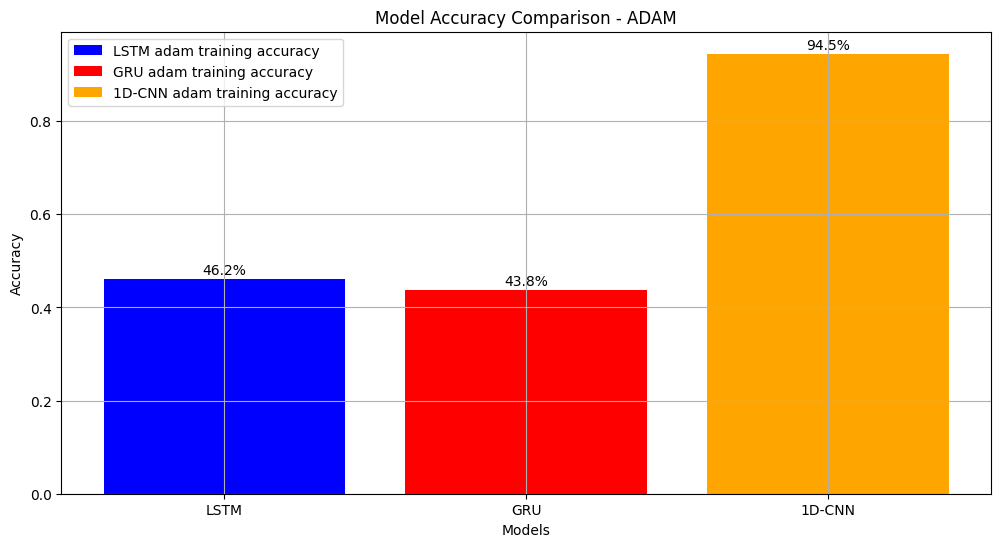

In [46]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


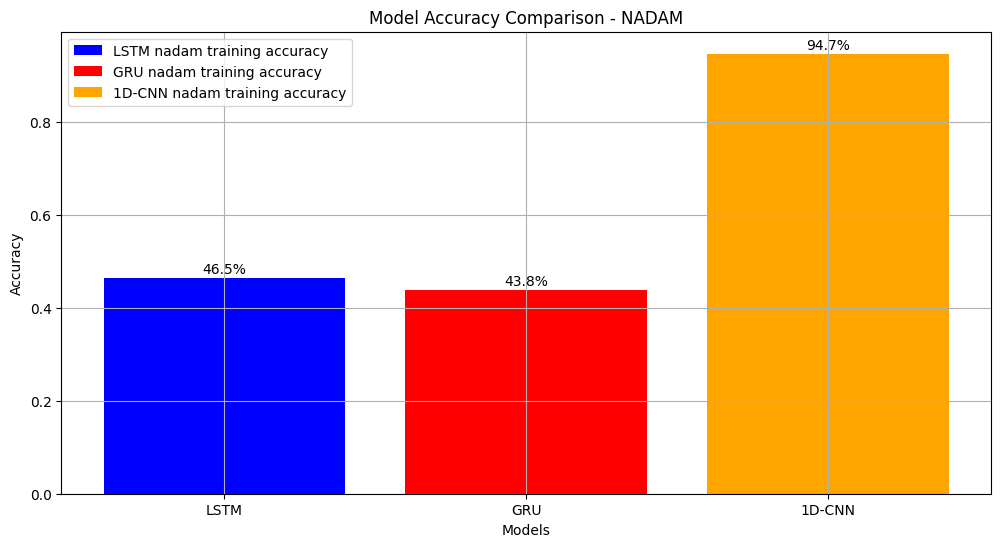

In [47]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


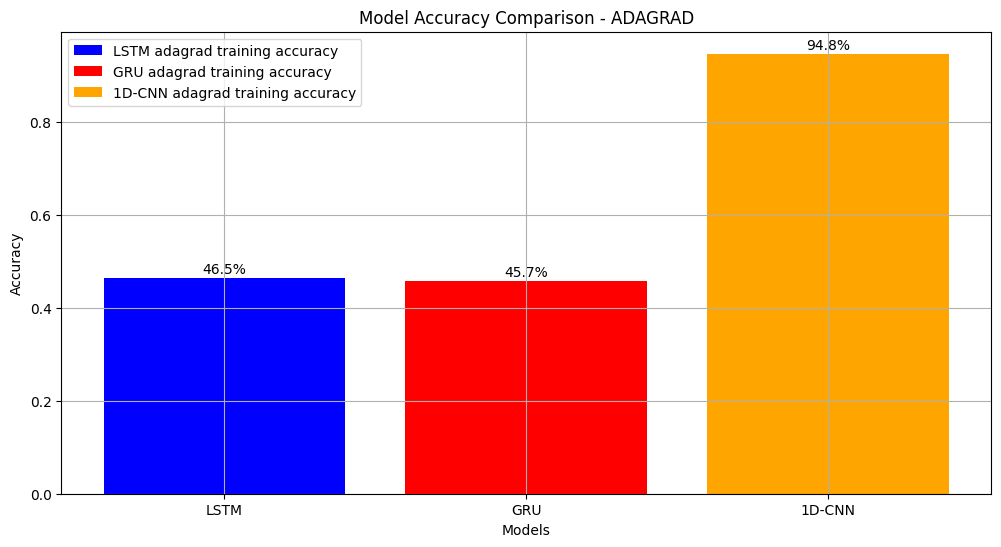

In [48]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


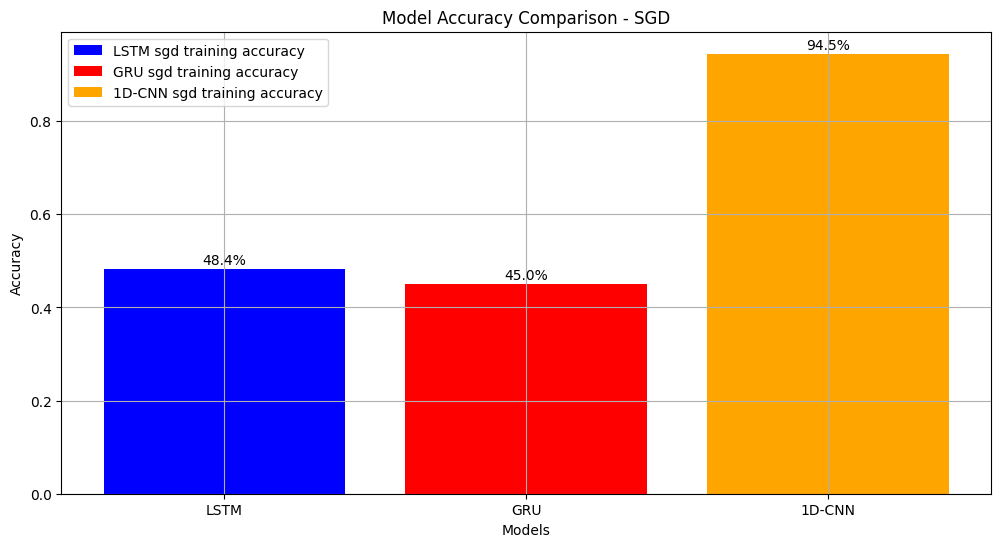

In [49]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


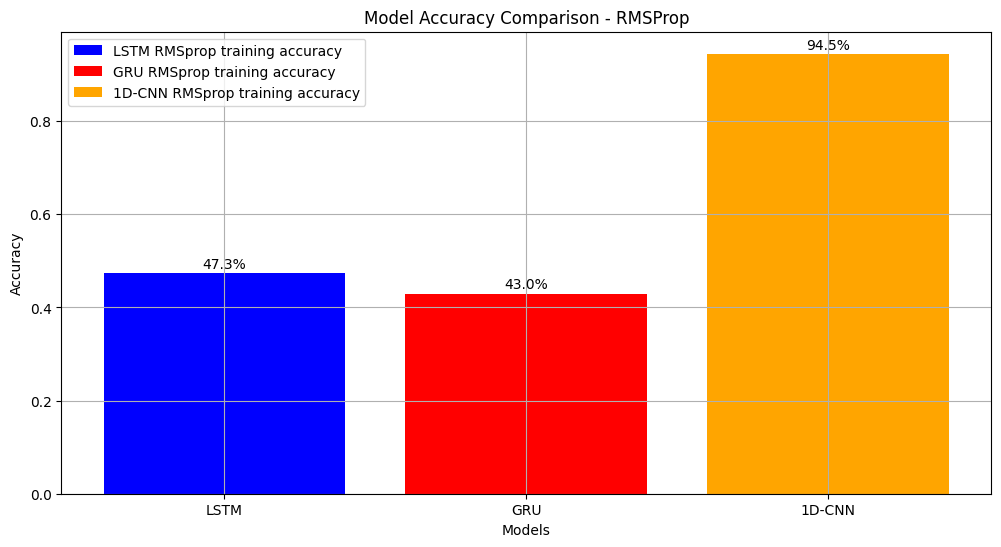

In [50]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


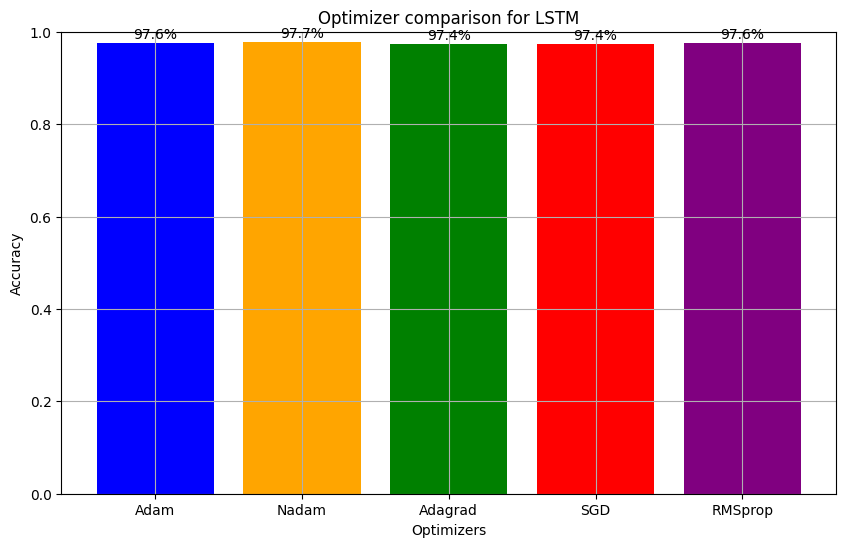

In [202]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()


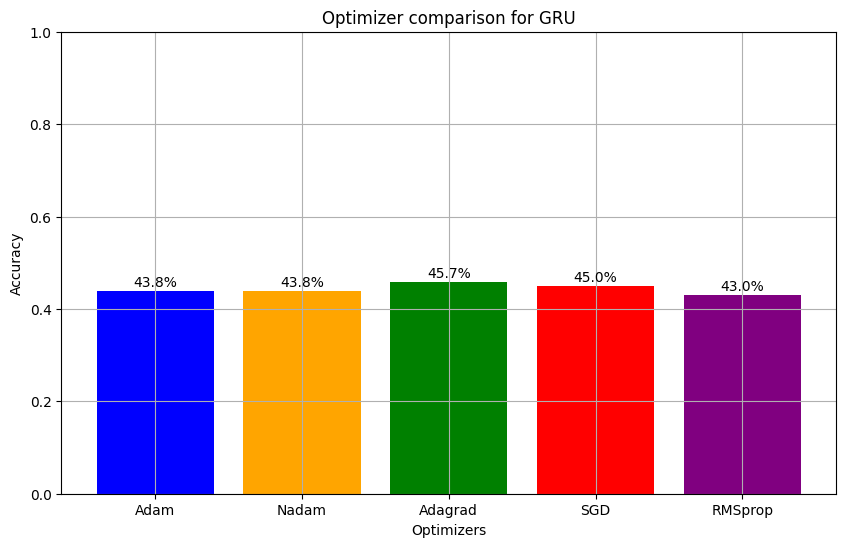

In [52]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()


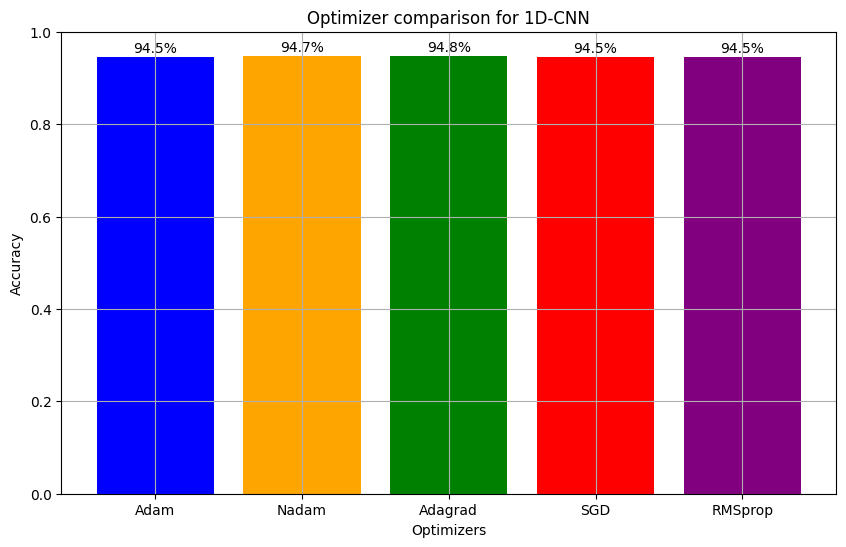

In [53]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()
